# Comparison of Mangoes, word2vec, GloVe

## Imports

In [24]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import mangoes

from construction import Construction
from properties import Property

In [2]:
emd_1500 = mangoes.Embeddings.load("data/ppmi_1500words_win2")
word_1500 = emd_1500.words

In [3]:
embedding = mangoes.Embeddings.load("data/ppmi_svd_en_dim500_win2_shift5_cds0.75_eig0")
embedding = mangoes.create_representation(embedding, reduction=mangoes.reduction.SVD(dimensions=200))

In [ ]:
# embedding = mangoes.Embeddings.load_from_text_file("data/Word2Vec_window_half_size=2_dirty=True_d=200.txt")

In [6]:
# embedding = mangoes.Embeddings.load_from_text_file("data/GloVe_window_half_size=2_dirty=False_d=200.txt")

Select 1500 common words from the vocabulary

In [5]:
nodes = embedding.matrix
label = list()
select = list()
for w in embedding.words:
    if w in word_1500:
        select.append(True)
        label.append(w)
    else:
        select.append(False)
nodes = nodes[select,:]
print ("The selected vocabulary contains %d words, and each word is represented by a vector of %d dimension." % nodes.shape)

The selected vocabulary contains 1494 words, and each word is represented by a vector of 200 dimension.


## Graph construction

k-nn graph with k = 5.

In [6]:
cons = Construction(nodes)
G = cons.knn(k=5, sigma=1)

## Degree, closeness, betweenness, eigenvector centrality.

*The first 10 largest degree nodes with various centrality notions.*

In [12]:
#list_degree = list(dict(nx.degree(G)).values())
#bet_centrality = nx.betweenness_centrality(G)
#cent = nx.eigenvector_centrality(G)
clo_centrality = nx.closeness_centrality(G)

list_clo_cen = list(dict(clo_centrality).values())
first_n = 10
index_ = np.asarray(list_clo_cen).argsort()[-first_n:][::-1]

listc = []
for i in index_:
    #print(str(label[i]))# + ' ' + str(list_clo_cen[i]))
    listc.append(label[i])
print(listc)

['of', 'the', 'and', 'a', 'only', 'although', 'in', 'however', 'made', 'both']


## Diameter

The diameter of word2vec built graph is:

In [13]:
prop = Property(G)
diameter = prop.diameter()

Diameter: 9


## Clustering coefficient

In [14]:
prop = Property(G)
clustering_coef = prop.clustering_coef()

Clustering coefficient: 0.29301853443


## Community detection

Modularity: 0.522584677922
Number of communities: 38


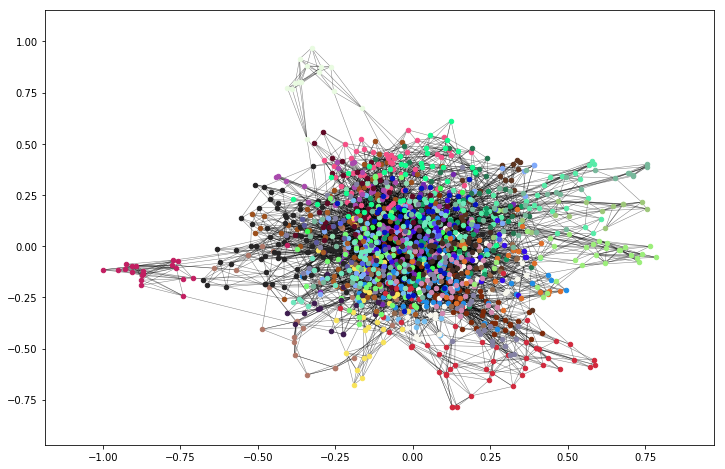

In [56]:
prop = Property(G)
partition = prop.community(resolution=0.5)

### Most central nodes in each community

In [16]:
deg_centrality = nx.degree_centrality(G)

central_nodes = []
for com in set(partition.values()) :
    list_nodes = [nod for nod in partition.keys() if partition[nod] == com]
    tmp = [deg_centrality[i]  for i in list_nodes]
    #print (list_nodes)
    #print (list_nodes[tmp.index(max(tmp))])
    central_nodes.append(label[list_nodes[tmp.index(max(tmp))]])
print('The central nodes of each community by degree centraility are:')
print(central_nodes)

The central nodes of each community by degree centraility are:
['latter', 'of', 'longer', 'population', 'means', 'cdp', 'the', 'since', 'another', 'succeeded', 'suggested', 'and', 'a', 'income', 'for', 'intended', 'established', 'came', 'actually', 'section', 'only', 'history', 'same', 'all', 'included', 'final', 'states', 'offered', 'although', 'subsequent', 'source', 'then', 'half', 'median', 'europe', 'm', 'thomas', 'both', 'in', 'built']


### Visualization of one certain community

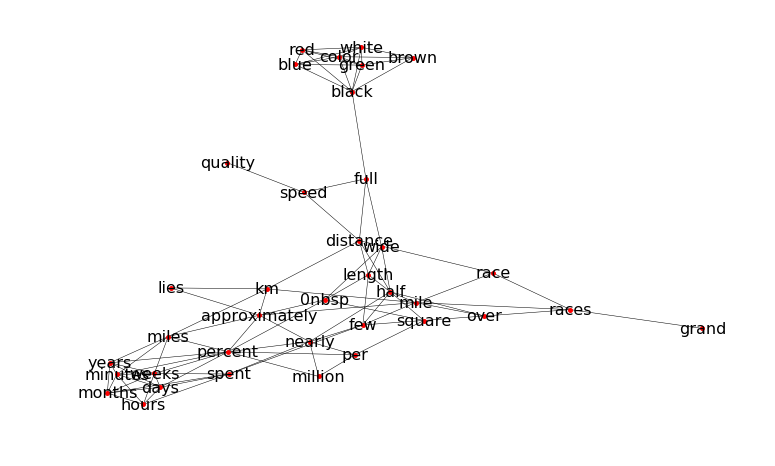

In [17]:
seq_community = 32
list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == seq_community]
community = G.subgraph(list_nodes)
pos = nx.spring_layout(community)
plt.figure(figsize=(10,6))
options = {'node_color': 'red',
           'node_size': 15,
           'width': 0.5,
           'font_size':16,
           'labels':  {i:label[i] for i in list_nodes}}
nx.draw(community, **options)
plt.show()

### Visulisation with RNG

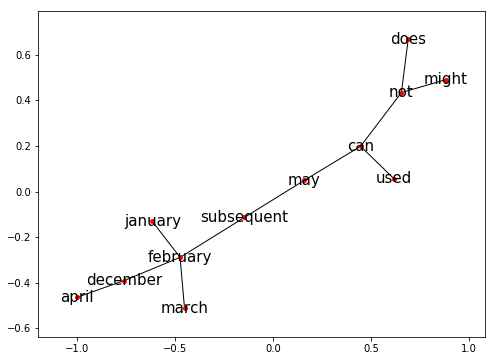

In [25]:
root_word = 'may'
root = label.index(root_word)

prop = Property(G)
prop.rn_tree(nodes, label, root = root, k_neig = 11)